# **INFORMASI DATASET**

```
Penjelasan Singkat Dataset
```
- Dataset ini berisi catatan transaksi perbankan dari nasabah yang mencakup informasi mengenai jumlah transaksi, waktu, lokasi, jenis transaksi, dan informasi pelanggan seperti usia, pekerjaan, serta riwayat transaksi. Dalam bentuk dolar ya setiap angka angka nya.

```
Tujuan
```
- Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa.
- Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

```
Sumber
```
- Sumbernya ada di bawah ini.

 > Ada di url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'


# **1. Import Library**

In [1]:
# Manipulasi data 
import numpy as np 
import pandas as pd 
import math
from scipy import stats

# Visualisasi data 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Preprcessing data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.preprocessing import PowerTransformer

# Model Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Reduksi dimensi data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Model Evaluasi
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Visualisasi Elbow 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Penyimpanan Model
import joblib


# **2. Memuat Dataset**

In [2]:
# Memuat dataset dari url github
url = 'https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

# Menampilkan hasilnya
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


## Penjelasan Singkat Setiap Fitur di Dataset

| No. | Kolom                      |Deskripsi                                                                 |
|-----|----------------------------|--------------------------------------------------------------------------|
| 1   | TransactionID              |ID unik untuk setiap transaksi                                            |
| 2   | AccountID                  |ID akun pelanggan                                                         |
| 3   | TransactionAmount          |Jumlah uang dalam transaksi                                               |
| 4   | TransactionDate            |Waktu dan tanggal transaksi terjadi                                       |
| 5   | TransactionType            |Jenis transaksi (Debit atau Credit)                                       |
| 6   | Location                   |Kota tempat transaksi dilakukan                                           |
| 7   | DeviceID                   |ID perangkat yang digunakan untuk transaksi                               |
| 8   | IP Address                 |Alamat IP dari transaksi                                                  |
| 9   | MerchantID                 |ID dari merchant tempat transaksi terjadi                                 |
| 10  | Channel                    |Media transaksi dilakukan (ATM, Online, dll)                              |
| 11  | CustomerAge                |Usia pelanggan                                                            |
| 12  | CustomerOccupation         |Pekerjaan pelanggan                                                       |
| 13  | TransactionDuration        |Lama waktu transaksi dalam detik                                          |
| 14  | LoginAttempts              |Jumlah percobaan login sebelum transaksi                                  |
| 15  | AccountBalance             |Saldo rekening saat transaksi                                             |
| 16  | PreviousTransactionDate    |Waktu transaksi sebelumnya                                                |

# **3. Exploratory Data Analysis (EDA)**

## **Memahami Struktur Data**

### Melihat Informasi Dataset

In [3]:
# Menampilkan informasi singkat tentang dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

- Dataset ini terdiri dari **2537** Baris dan juga **16** Fitur/Kolom.
- Tipe Datanya di dominasi oleh object dengan **11** Fitur dan sisanya adalah float64 dengan **5** Fitur
- Terlihat bahwa adanya inkonsistensi Tipe Data pada fitur TransactionDate dan  PreviousTransactionDate juga yang seharusnya bertipe data datetime.
- Keseluruhan Fitur memiliki Missing Values.

### Melihat Statistik Deskriptif

In [4]:
# Menampilkan statistik deskriptif sekaligus menggunakan display
display(df.describe(), df.describe(include='object'))

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate
count,2508,2516,2509,2507,2507,2507,2517,2514,2510,2514,2513
unique,2484,495,2485,2,43,681,591,100,3,4,360
top,TX000592,AC00363,2023-10-20 17:53:13,Debit,Fort Worth,D000315,200.136.146.93,M026,Branch,Student,2024-11-04 08:09:17
freq,2,12,2,1942,71,9,12,46,868,657,18


 ```
Fitur Numerik
 ```
**TranscationAmount**

- Kita bisa lihat rata rata transaksi ada di **297.65** ini lumayan tinggi, terus Standar Deviasi di angka **292.23** yang hampir sama dengan Mean menunjukan bahwa adanya penyebaran nominal transaksi yang sangat besar.
- Bisa di buktikan dengan Adanya transaksi kecil mulai dari **0.26** hingga transaksi besar mencapai **1919.11** , artinya pola transaksi pelanggan sangat bervariasi. Tapi min disini cukup mencurigakan nanti kita selidiki saja. Sebagian nominal transaksi ada di rentang **81.31** - **413.10**.
- Dengan Mean dan Median **211** yang cukup jauh, ini mengindikasikan bahwa distribusi jumlah transaksi tidak normal , melainkan condong ke kanan (**right-skewed**). Pasti bakal banyak outliers sih disini.

**CustomerAge**

- Rata rata usia yang pake bank ini ada di **45 Tahun**, dengan Standard Deviasi ada di angka **17.83 Tahun** yang menunjukkan variasi demografi yang sangat baik.
- Di buktikan dengan rentang Usia yang bervariasi dari usia muda **18 tahun** sampai lanjut usia **80 tahun**. Sebagian besar usia ada di rentang **27 Tahun** sampai **59 Tahun**.
- Distribusi kemungkinan agak simetris karena tidak ada perbedaan signifikan antara Mean dan Median **45 tahun**.

**TransactionDuration**

- Rata rata durasi setiap transaksi ada di **120 detik** atau **2 Menit**, dengan std di kisaran **70 detik**. Durasinya bervariasi dari 10 detik hingga 5 menit , dengan kesimpangan yang lumayan besar.

**LoginAttempts**

- Sebagian besar transaksi hanya membutuhkan **1** upaya login , sesuai dengan median dan minimum yang nilainya **1**. Terus jika di lihat Max nya ada upaya login hingga **5** kali , mungkin ini orang yang melakukan kesalahan input password atau mungkin kasus buruknya adalah aktivitas mencurigakan.
- Rata ratanya sedikit di atas 1 menunjukkan ada sedikit outlier yang membuat rata-rata naik.

**AccountBalance**

- Disini bisa kita lihat nilainya sangat bervariasi sekali dari mulai Min **101.25** sampai Max di sekitar **15 Ribuan** dengan rata-rata sekitar **5.100** yang menunjukan adanya kelas kelas dari nasabah.
- Standar deviasi yang besar menunjukkan variasi yang tinggi ada nasabah dengan saldo rendah dan banyak yang memiliki saldo tinggi.
Distribusi kemungkinan juga condong ke kanan , dengan sebagian besar nilai berada di kisaran bawah dan sedikit nasabah dengan saldo sangat tinggi.

```
Fitur Kategorik
```
> Aku hanya akan fokus kepada fitur fitur yang penting saja buat clustering.


**CustomerOccupation**
- Bisa kita lihat nilai unik nya berjumlah **4** saja dengan dominasi nya adalah **student** dengan kemunculan dalam dataset nya sebanyak **657** kali, yang membuktikan bahwa `TransactionAmount` dan juga `AccountBalance` benar bahwa rata ratanya itu ada di transaksi bawah.

**Channel**
- Kalau Channel atau saluran yang di pakai transaksi oleh para nasabah memiliki **3** nilai unik saja, di dominasi oleh **Branch** dengan frequensi nya ada di angka **868**, ini menunjukan bahwa kemungkinan kebanyakan nasabah bertransaksi langsung ke bank atau ke cabang, biasanya sih kelompok yang udah tua yang datang suka datang langusng ke cabang mah.

**Location**
- Ya kalau lokasi pasti banyak sekali nilai unik nya bisa kita lihat ada **43** wilayah nih cukup banyak juga nih cakupan bank nya. Di dominasi oleh **Fort Worth** dengan kemunculan **71 Kali**.




### Melihat Korelasi Awal (Tanpa Visualisasi)

In [6]:
# Filter hanya fitur numerik untuk korelasi
num_features = df.select_dtypes(include=['float64']).columns

# Melihat Korelasi
df[num_features].corr()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.024428,0.004782,-0.007397,-0.026310
CustomerAge,-0.024428,1.000000,-0.009852,0.007876,0.321161
TransactionDuration,0.004782,-0.009852,1.000000,0.030076,0.006859
LoginAttempts,-0.007397,0.007876,0.030076,1.000000,0.009088
AccountBalance,-0.026310,0.321161,0.006859,0.009088,1.000000


- Mungkin kalau disini aku tidak akan menjelaskan karena kurang enak, nanti aku bakal visualisasikan saja.

## Visualisasi Data

### Visualisasi untuk Fitur Numeric

#### Membuat Histogram Untuk Melihat Distribusi Data

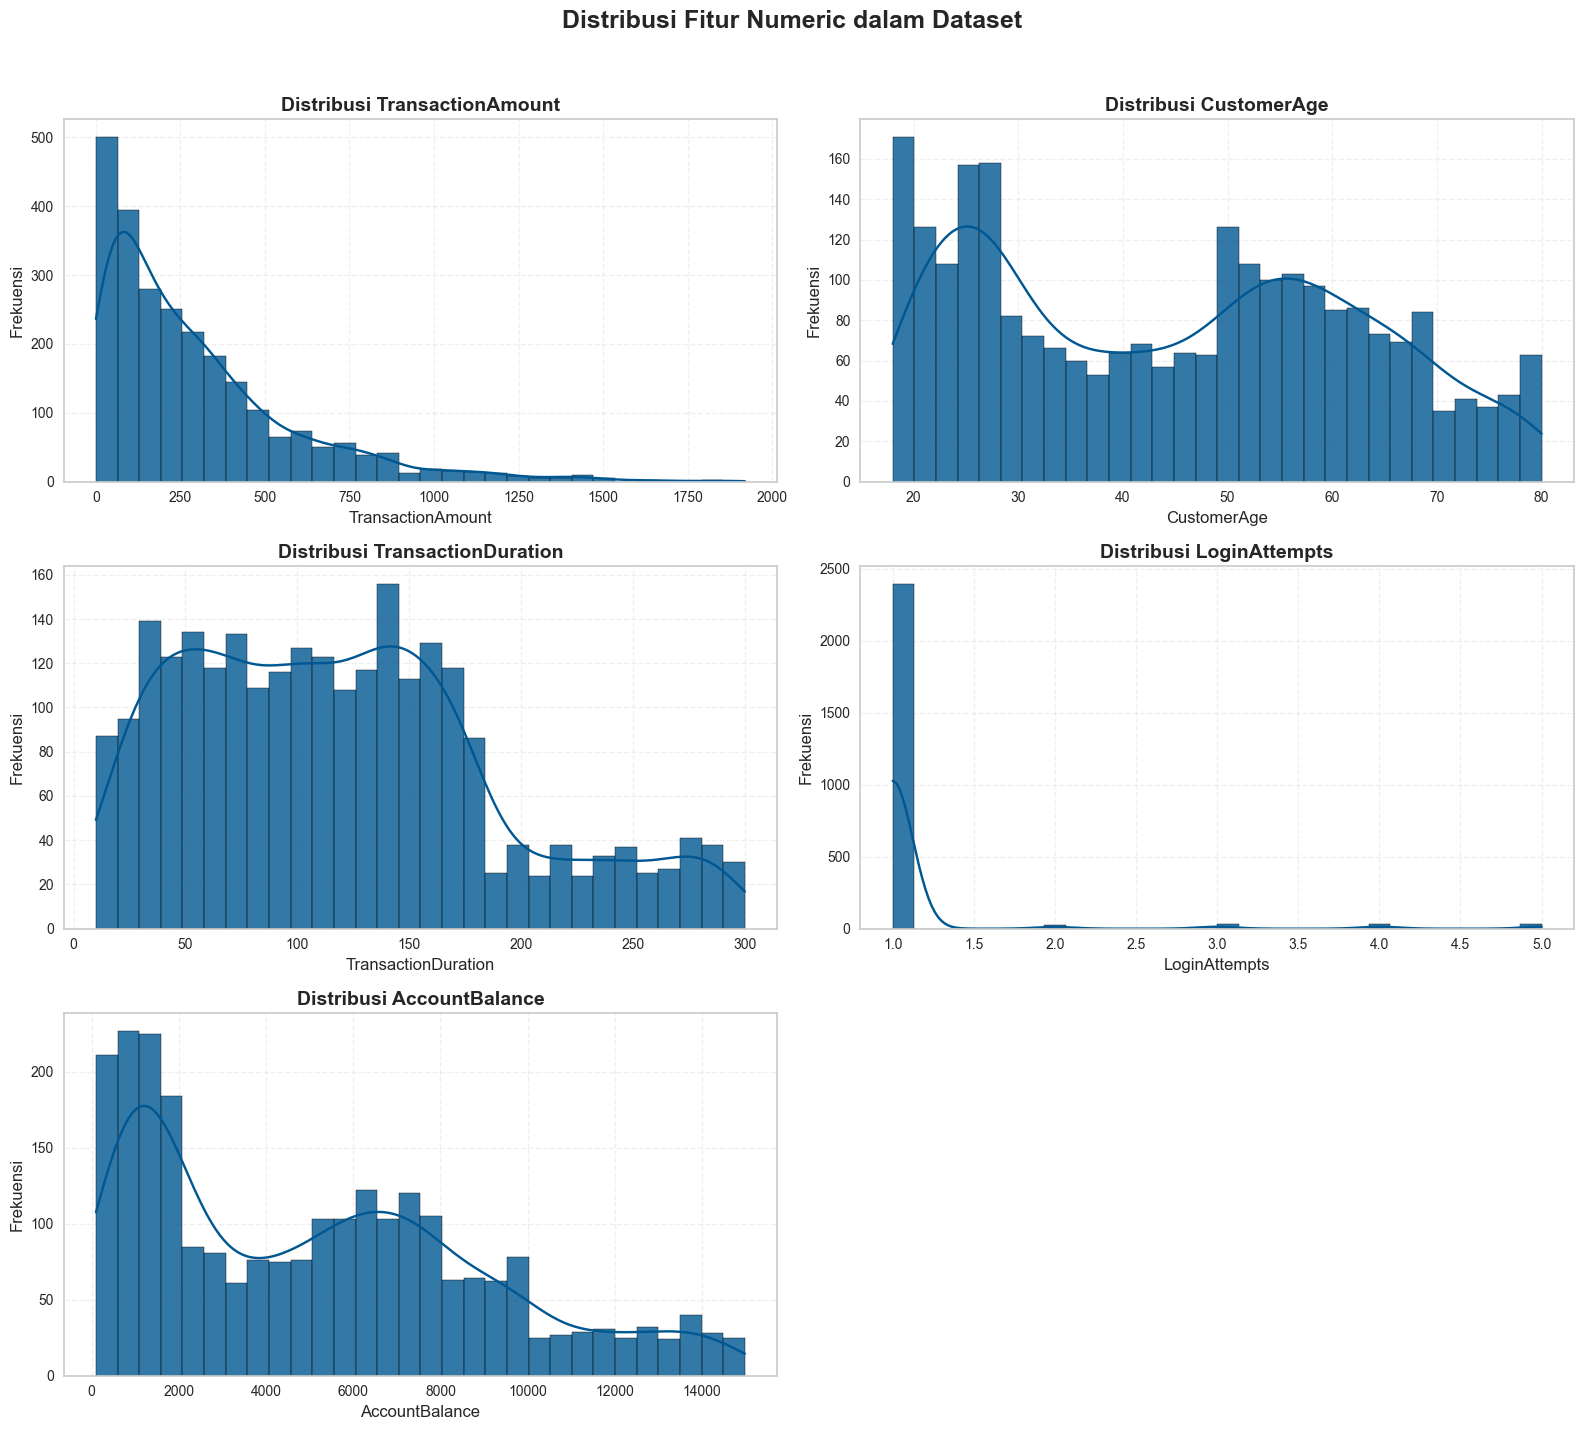

In [7]:
# Setup figure terlebih dahulu
fig, ax = plt.subplots(3, 2, figsize=(16, 14))
ax = ax.flatten()
primary_color = '#005792'

# Membuat plot histogram setiap fitur
for i, col in enumerate(num_features):
    sns.histplot(df[col], ax=ax[i], color=primary_color, kde=True, bins=30, edgecolor='black', alpha=0.8)
    ax[i].set_title(f'Distribusi {col}', fontsize=14, fontweight='bold')
    ax[i].set_xlabel(col, fontsize=12)
    ax[i].set_ylabel('Frekuensi', fontsize=12)
    ax[i].grid(True, linestyle='--', alpha=0.3)
    
# Menghpaus subplots yang sendirian 
fig.delaxes(ax[-1])

# Menampilkannya
plt.suptitle('Distribusi Fitur Numeric dalam Dataset', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Dari Visualisasi Histogram di atas kita bisa lihat bahwa setiap fitur ini condong ke kanan atau (right-skewed).

```
TransactionAmount
```
- Dari mulai **TransactionAmount** bisa kita lihat ini Fitur yang paling memiliki (right-skewed) yang cukup parah, yang mengindikasikan bawha transaksi terjadi kebanyakan pada nominal bawah, lebih banyak transaksi dengan nominal kecil ketimbang nominal yang sangat besar, dan itu wajar karena ya bukan hanya 10 nasabah, tapi 2000+ nasabah dan juga pasti ada kesenjangan sosial.
- Di buktikan dengan kebanyakan nilai terkumpul pada **500** kebawah, pada 750 ke bawah masih lumayan banyak tapi sudah mulai menyusut. Dan terakhir mungkin inimah pasti bakal di anggap outliers nih pasti udah fix yakin sekali di atas 1000 ke atas itu sangat jarang.

```
AccountBalance
```
- Yaps sama seperti **TransactionAmount** kita bisa lihat bahwa nilai nya sangat condong ke kanan atau (right-skewed) tapi tidak separah **TransactionAmount**. Nilai terkumpul di bawah 5000, yang mengindikasikan mayoritas nasabah memiliki Saldo yang di bawah 5000. Tapi ada juga yang memiliki 10.000+ ini gagah ya calon calon outliers inimah.

```
CustomerAge
```

- Disini kita bisa melihat bahwa distribusi data atau nilai dari **CustomerAge** ini cukup terdistribusi dengan baik, rata rata nya ada di umur 45 - 55 Tahun, terus semakin ke kanan mentok mentok sampai 80 Tahun. Ini bagus sih distribusinya jadi good game.



#### Membuat ScatterPlot untuk Bivariate Visualization

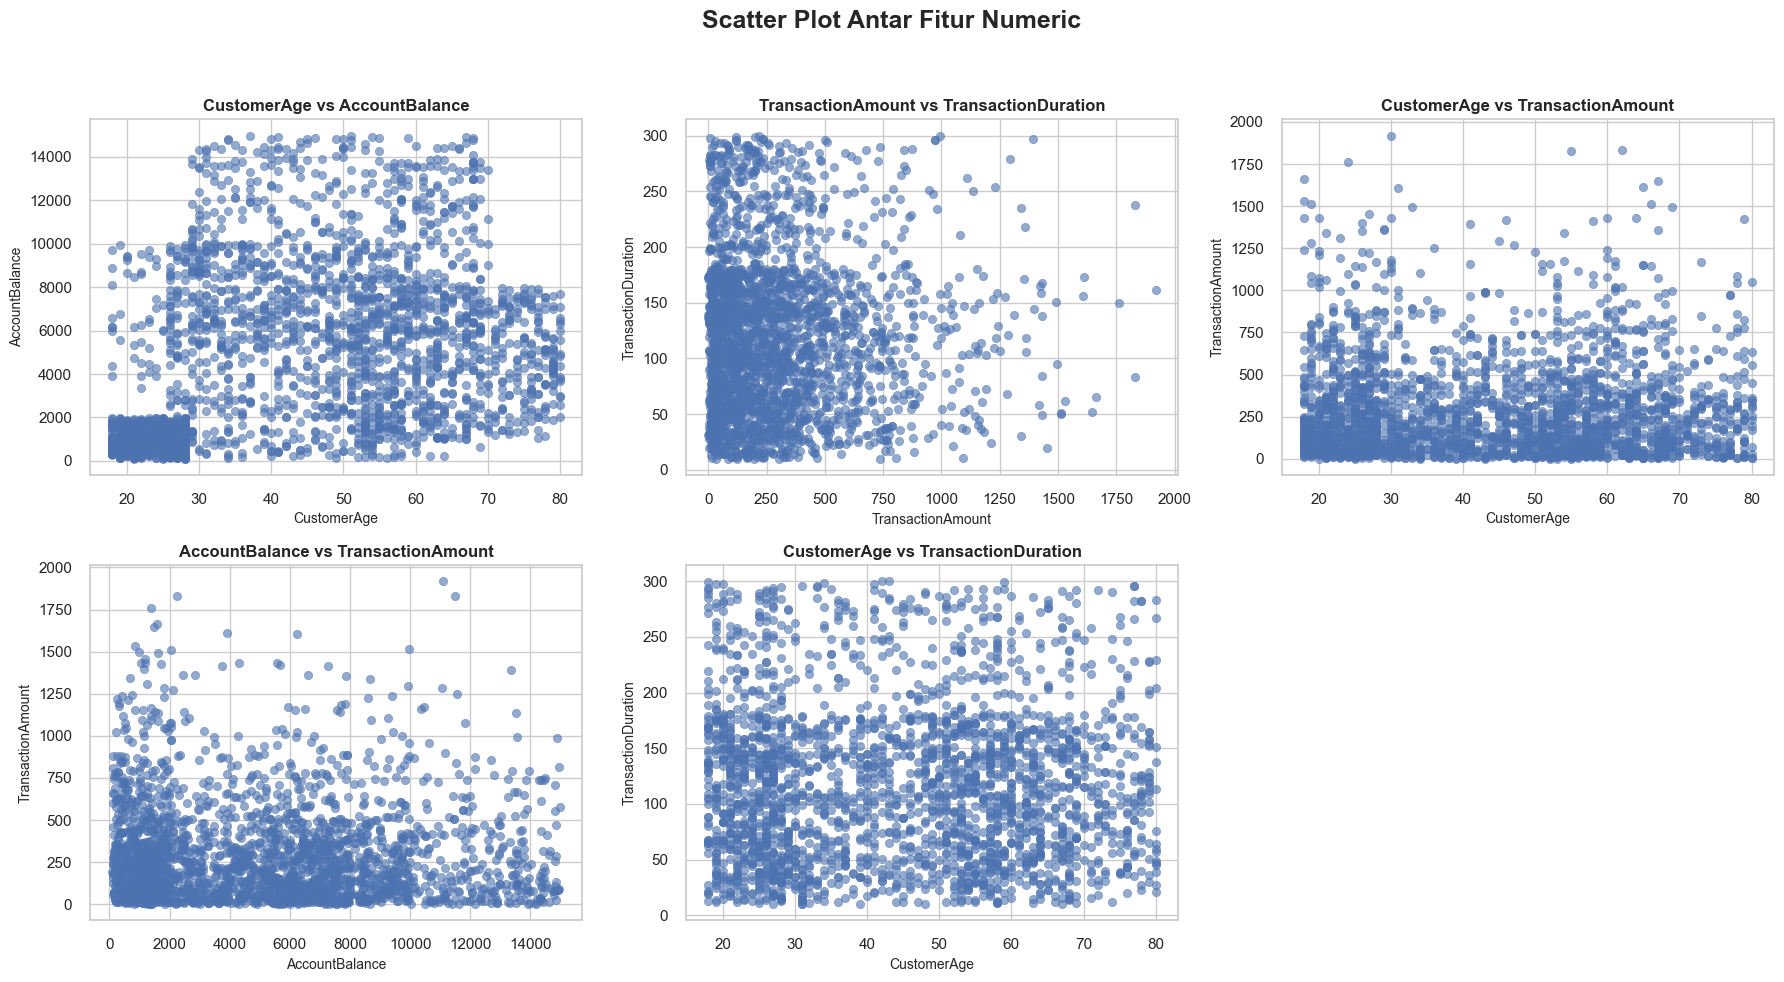

In [10]:
# Membuat Visualisasi ScatterPlot
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Scatter Plot Antar Fitur Numeric', fontsize=18, fontweight='bold')

# List kombinasi yang akan kita pasangkan
pairs = [
    ('CustomerAge', 'AccountBalance'),
    ('TransactionAmount', 'TransactionDuration'),
    ('CustomerAge', 'TransactionAmount'),
    ('AccountBalance', 'TransactionAmount'),
    ('CustomerAge', 'TransactionDuration')
]

# Loop plot
for i, (x, y) in enumerate(pairs):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.scatterplot(data=df, x=x, y=y, ax=ax, alpha=0.6, edgecolor=None)
    ax.set_title(f'{x} vs {y}', fontsize=12, fontweight='bold')
    ax.set_xlabel(x, fontsize=10)
    ax.set_ylabel(y, fontsize=10)


if len(pairs) < 6:
    fig.delaxes(axes[1, 2])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Dari scatter plot ini aku bakall highlight hal hal yang menarik saja.

```
CustomerAge Vs AccountBalance
```
- Bisa kita lihat di **Scatterplot** **CustomerAge** Vs **AccountBalance** bahwa pada usia **20 - 28** Tahun terlihat penumpukan titik titik dot, yang mengindikasikan bahwa di masa early adulthood atau emerging adulthood, rata rata saldo yang merkea punya kebanyakan ada di **2.000** dolar, tapi tidak menutup kemungkinan bahwa di Usia tersebut juga memiliki saldo atau **AccountBalance** sebesar **4.000** dolar sampai **10.000** dolar, jika kita lihat pada **Scatterplot** nya.
- Hal menarik lainnya adalah ketika Usia di atas **30 - 70 Tahun** mulai tuh mereka punya saldo yang tinggi tinggi, dengan rentang saldo **0 - 15.000**. Jika kita lihat secara lebih detail pada usia **30 - 50 Tahun** kita bisa melihat bahwa titik titik dot lebih berkumpul kepada renatag saldo **6.000 - 4.500** dolar tapi masih ada yang saldonya di bawah itu dan di atas itu juga. Nah jika kita lihat lagi pada rentang Usia **50 - 70** Tahun, titik titik dotnya lebih bervariasi meskipun terpusat nya pada rentan saldo **100 - 8.000** dolar.
- Ini menunjukan bahwa semakin kita ada di Usia yang sudah bekerja maka semakin kita juga mempunyai **AccountBalance** yang relatif tinggi, tapi semakin tua kita semakin menyusust **AccountBalance** kita, bisa kita lihat pada Usia **70 - 80** Tahun yang hanya mentok mentok paling tinggi ada di **8.000** dolar.

```
CustomerAge Vs TransactionAmount
```

- Di temukan bahwa mayrotias nominal transaksi itu ada di **500** kebawah, entah usianya berapa tapi memang **500** ini bisa kita jadikan pembatas dan rata rata karena dalam visualisasi **Scatterplot** menunjukan hal serupa, tapi yang perlu di perhatikan disini rata rata Transaksi dengan nominal **1.000** itu tersebar luas di semua kelompok Usia, tapi yang paling membuat aku penasaran adalah kebanyakan transaksi dengan nominal di atas **1.250** ada di kelompok usia **20 - 30** Tahun, ini keren juga anak muda disana apakah berbisnis atau mungkin bapaknya yang suka minjem ATM anaknya nih.
- Terus pada rentang Usia **48 - 55** Tahun bisa kita lihat bahwa mereka gak terlalu implusif untuk bertransaksi secara nominal gede, mungkin mereka lebih safe money, atau berinvestasi buat masa tua, atau nabung di reksadana dan lain lainnya.

```
AccountBalance Vs TransactionAmount
```

- Kalau dari **Scatterplot** ini jujur aku tidak terlalu menemukan insight yang menarik, tapi yang bisa aku katakan adalah semakin tinggi **AccountBalance** seseorang maka semakin menyebar dan bervariasi juga Nominal Transaksi nya, meskipun ada saldo dengan reantang **0 - 2.000** dolar tapi sudah bertrankasi secara gede gedean, mungkin ini awal dia menggunakan jasa bank terkait.


```
Kesimpulan ScatterPlot
```
- Kalau kita lihat dari segi korelasi aku bakal menyimpulkan bahwa Secara keseluruhan, korelasi antar fitur numerik dalam dataset ini cenderung lemah hingga sedang. Fitur **AccountBalance** menunjukkan korelasi yang paling menarik dengan fitur lain, terutama dengan **CustomerAge** dan **TransactionAmount**. Sementara itu, CustomerAge dan TransactionDuration tampaknya tidak memiliki korelasi yang kuat dengan fitur lainnya.

